In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv('/content/Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


9449.962321455077 24848.203966523204


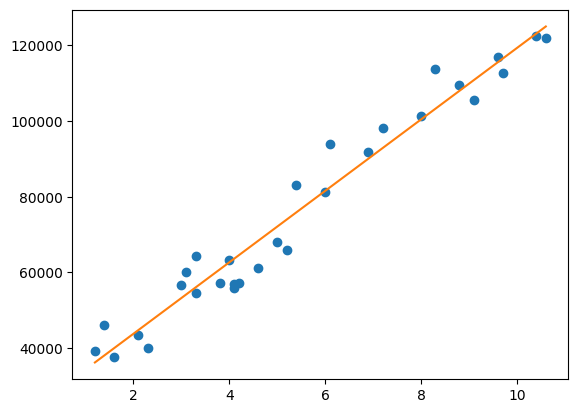

In [5]:
x=data['YearsExperience']
y=data['Salary']
plt.plot(x, y, 'o')
m, b= np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
print(m,b)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

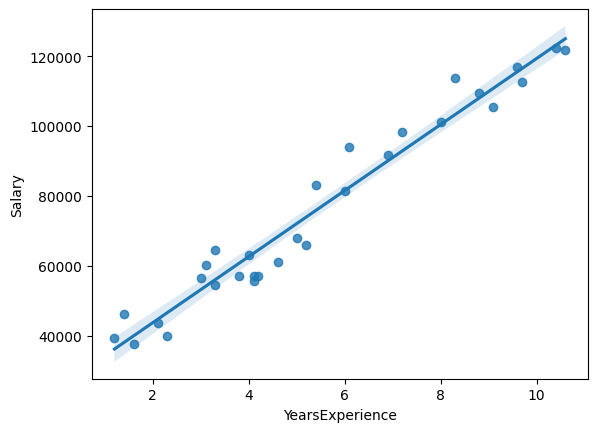

In [6]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

In [7]:
x=data['YearsExperience'].values
x

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
        4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
        8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6])

In [8]:
y=data['Salary'].values
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

In [9]:
def equation(X,weights):
  """
  y = mx + c
  y -> y_hat
  x -> x
  m -> weight1
  c -> weight0
  """

  y_hat = weights[1]*X + weights[0]
  return y_hat

In [10]:
def error(X,Y,weights):
  """
  error = (1/n) * sum from 1 to n of (y - y_hat)^2
  """
  err = 0
  n = len(Y)
  for i in range(n):
    y_hat = equation(X[i],weights)
    y = Y[i]
    error = (y - y_hat)**2
    err += error
  return err/n

In [11]:
def gradient(X,Y,weights):
  """
  Eq wrt w0 gradient: -2(y-y_hat)
  Eq wrt w1 gradient: -2x(y-y_hat)
  """
  grad = np.zeros(2)
  n = len(Y)
  for i in range(n):
    x = X[i]
    y = Y[i]
    y_hat = equation(x,weights)
    grad[0] += -2 * (y-y_hat)
    grad[1] += -2*x*(y-y_hat)
  return grad/n

In [12]:
def gradient_descent(X,Y, learning_rate = 0.1, max_steps = 100):
    # step 1: starting weights
    weights = np.random.rand(2) # eg: array([0.66689291, 0.39290544])
    weights = np.array([0.0,0.500])
    # step 2: do max_steps of gradient descent
    error_list = []
    weight_list_0 = []
    weight_list_1 = []
    grad_1 = []
    grad_0 = []
    for i in range(max_steps):
        error_list.append(error(X, Y, weights)) # storing error for plotting
        gradients = gradient(X, Y, weights)
        weight_list_0.append(weights[0])
        weight_list_1.append(weights[1])
        grad_1.append(gradients[1])
        grad_0.append(gradients[0])
        weights [0] = weights [0]-learning_rate*gradients[0]  # w0
        weights [1] = weights [1]-learning_rate*gradients[1]  # w1
    return weights, error_list,weight_list_1,weight_list_0,grad_0,grad_1

In [13]:
opt_weights, error_list,w1,w0,g0,g1 = gradient_descent(x,y)

In [14]:
opt_weights

array([-1.19060083e+85, -8.11217765e+85])

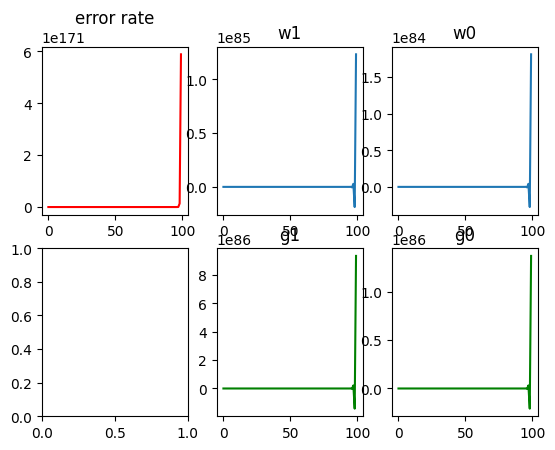

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=3)
ax[0,0].plot(error_list,c='r')
ax[0,0].set_title('error rate')
ax[0,1].plot(w1)
ax[0,1].set_title('w1')
ax[0,2].plot(w0)
ax[0,2].set_title('w0')
ax[1,2].plot(g0,c='g')
ax[1,2].set_title('g0')
ax[1,1].plot(g1,c='g')
ax[1,1].set_title('g1')
plt.show()

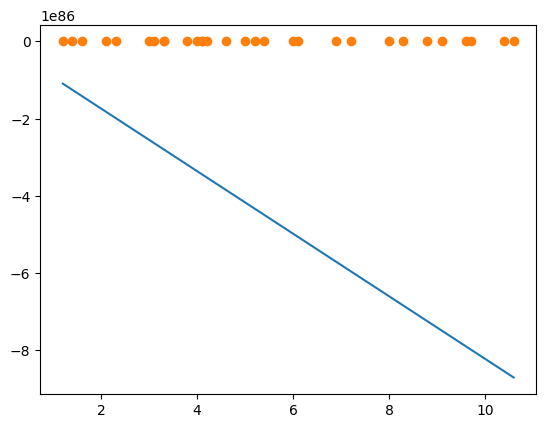

In [16]:

b,m=opt_weights
x=data['YearsExperience']
y=data['Salary']
plt.plot(x, m*x+b)
plt.plot(x, y, 'o')

In [17]:
def gradient_descent(X,Y, learning_rate = 0.01, max_steps = 1000):
    # step 1: starting weights
    weights = np.random.rand(2) # eg: array([0.66689291, 0.39290544])
    # step 2: do max_steps of gradient descent
    error_list = []
    weight_list_0 = []
    weight_list_1 = []
    grad_1 = []
    grad_0 = []
    for i in range(max_steps):
        error_list.append(error(X, Y, weights)) # storing error for plotting
        gradients = gradient(X, Y, weights)
        weight_list_0.append(weights[0])
        weight_list_1.append(weights[1])
        grad_1.append(gradients[1])
        grad_0.append(gradients[0])
        weights [0] = weights [0]-learning_rate*gradients[0]  # w0
        weights [1] = weights [1]-learning_rate*gradients[1]  # w1
    return weights, error_list,weight_list_1,weight_list_0,grad_0,grad_1

In [18]:
opt_weights, error_list,w1,w0,g0,g1 = gradient_descent(x,y)

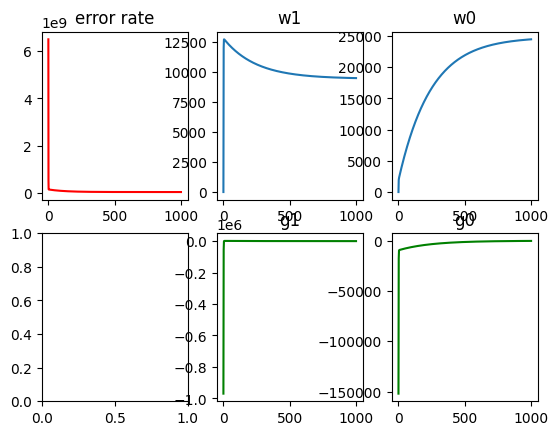

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=3)
ax[0,0].plot(error_list,c='r')
ax[0,0].set_title('error rate')
ax[0,1].plot(w1)
ax[0,1].set_title('w1')
ax[0,2].plot(w0)
ax[0,2].set_title('w0')
ax[1,2].plot(g0,c='g')
ax[1,2].set_title('g0')
ax[1,1].plot(g1,c='g')
ax[1,1].set_title('g1')
plt.show()

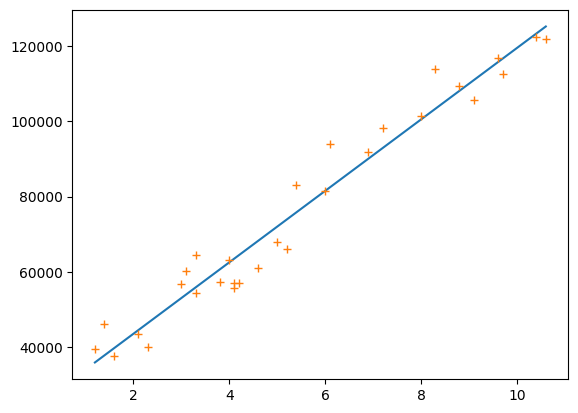

In [20]:
b,m=opt_weights
x=data['YearsExperience']
y=data['Salary']
plt.plot(x, m*x+b)
plt.plot(x, y, '+')